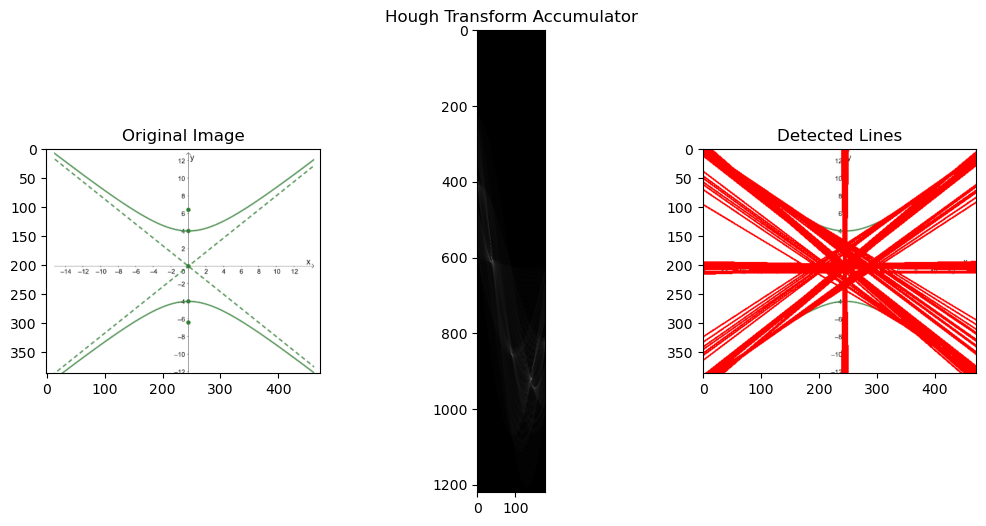

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def hough_transform(image, theta_res=1, rho_res=1):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply edge detection (you can use other edge detection methods as well)
    edges = cv2.Canny(gray, 50, 150)

    # Define the Hough space (parameter space)
    height, width = edges.shape
    diagonal_length = int(np.sqrt(height**2 + width**2))
    max_rho = diagonal_length
    rhos = np.arange(-max_rho, max_rho, rho_res)
    thetas = np.deg2rad(np.arange(-90, 90, theta_res))

    # Initialize accumulator array
    accumulator = np.zeros((len(rhos), len(thetas)), dtype=int)

    # Iterate through edge points in the image
    edge_points = np.column_stack(np.where(edges > 0))
    for point in edge_points:
        y, x = point
        for theta_idx, theta in enumerate(thetas):
            rho = int(x * np.cos(theta) + y * np.sin(theta))
            rho_idx = np.argmin(np.abs(rhos - rho))
            accumulator[rho_idx, theta_idx] += 1

    return accumulator, rhos, thetas

def get_lines(accumulator, rhos, thetas, threshold=100):
    lines = []
    y_indices, x_indices = np.where(accumulator > threshold)
    for y, x in zip(y_indices, x_indices):
        rho = rhos[y]
        theta = thetas[x]
        lines.append((rho, theta))
    return lines

def draw_lines(image, lines):
    result = image.copy()
    for rho, theta in lines:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(result, (x1, y1), (x2, y2), (0, 0, 255), 2)
    return result

# Load an image
image = cv2.imread('/mnt/Datastore/usr/kptroung/dasly/notebooks/hyperpola.png')

# Apply Hough Transform
accumulator, rhos, thetas = hough_transform(image)

# Get detected lines
lines = get_lines(accumulator, rhos, thetas, threshold=100)

# Draw the lines on the original image
result = draw_lines(image, lines)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(132), plt.imshow(accumulator, cmap='gray'), plt.title('Hough Transform Accumulator')
plt.subplot(133), plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB)), plt.title('Detected Lines')
plt.show()


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('images.png', cv2.IMREAD_GRAYSCALE)

# Apply edge detection to highlight the features
edges = cv2.Canny(image, 50, 150, apertureSize=3)

# Use the Hough Transform to detect lines (including hyperbolas)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

# Draw the lines on a copy of the original image
image_with_lines = image.copy()

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the result
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(image_with_lines, cmap='gray')
plt.title('Detected Lines')

plt.show()


TypeError: 'NoneType' object is not iterable

In [2]:
image